# Turkish Lira Banknote

### We will be developing a model that recognizes Turkish lira banknotes in this project

<a href='https://www.kaggle.com/datasets/baltacifatih/turkish-lira-banknote-dataset/data' target=_blank>You can find the data file here</a>

<img src=https://st2.depositphotos.com/4492993/10999/i/450/depositphotos_109998900-stock-photo-turkish-lira-banknotes.jpg width='300'>

In [1]:
import cv2
import pandas as pd
import os

In [2]:
labels = ['5','10','20','50','100','200']
img_path = 'archive/'

In [3]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [4]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [5]:
df.tail(10)

,img,label
5990,archive/200/200_1_0243.png,200
5991,archive/200/saltAndPeppered_200_1_0063.png,200
5992,archive/200/flipped_200_1_0068.png,200
5993,archive/200/200_1_0257.png,200
5994,archive/200/flipped_200_1_0083.png,200
5995,archive/200/flipped_200_1_0097.png,200
5996,archive/200/saltAndPeppered_200_1_0088.png,200
5997,archive/200/200_1_0280.png,200
5998,archive/200/eplus_200_1_0224.png,200
5999,archive/200/200_1_0294.png,200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     6000 non-null   object
 1   label   6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [7]:
d={'5':0,'10':1,'20':2,'50':3,'100':4,'200':5}

In [8]:
df['encode_label']=df['label'].map(d)

In [9]:
df['encode_label'].value_counts()

encode_label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
Name: count, dtype: int64

In [10]:
df.sample(5)

,img,label,encode_label
693,archive/5/eplus_5_2_0003.png,5,0
3113,archive/50/50_2_0091.png,50,3
933,archive/5/eplus_5_1_0019.png,5,0
5554,archive/200/200_1_0434.png,200,5
4682,archive/100/eplus_100_2_0037.png,100,4


In [11]:
import matplotlib.pyplot as plt

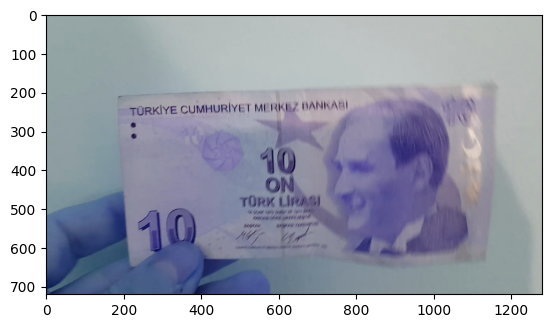

In [12]:
image=cv2.imread(str(df['img'][1010]))
plt.imshow(image);

In [13]:
import numpy as np

In [14]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(30,30))
    img=img/255.0   
    x.append(img)

In [15]:
x=np.array(x)

In [16]:
x

array([[[[0.0745098 , 0.23529412, 0.34901961],
         [0.03921569, 0.2       , 0.31372549],
         [0.03137255, 0.18431373, 0.29803922],
         ...,
         [0.        , 0.02745098, 0.1254902 ],
         [0.        , 0.01176471, 0.10980392],
         [0.        , 0.01568627, 0.10196078]],

        [[0.01176471, 0.16862745, 0.27058824],
         [0.01960784, 0.17647059, 0.27843137],
         [0.05490196, 0.20392157, 0.30588235],
         ...,
         [0.        , 0.10588235, 0.21960784],
         [0.        , 0.06666667, 0.17254902],
         [0.        , 0.0627451 , 0.16470588]],

        [[0.        , 0.10980392, 0.21176471],
         [0.        , 0.1372549 , 0.23921569],
         [0.02745098, 0.16470588, 0.27058824],
         ...,
         [0.        , 0.0627451 , 0.18039216],
         [0.        , 0.01960784, 0.1254902 ],
         [0.        , 0.03137255, 0.14901961]],

        ...,

        [[0.        , 0.07843137, 0.18431373],
         [0.        , 0.09019608, 0.18823529]

In [17]:
y=df['encode_label']

In [18]:
y.value_counts()

encode_label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [22]:
model = Sequential()
model.add(Input(shape=(30,30, 3)))


model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test), 
                    epochs=50,
                    verbose=1)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.1968 - loss: 2.1615 - val_accuracy: 0.2475 - val_loss: 1.9874
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5336 - loss: 1.0788 - val_accuracy: 0.2958 - val_loss: 1.7368
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7209 - loss: 0.7255 - val_accuracy: 0.7708 - val_loss: 0.6090
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8351 - loss: 0.4501 - val_accuracy: 0.7425 - val_loss: 0.7743
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8712 - loss: 0.3790 - val_accuracy: 0.9133 - val_loss: 0.2411
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9177 - loss: 0.2459 - val_accuracy: 0.6842 - val_loss: 1.2510
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9406 - loss: 0.1819 - val_accuracy: 0.9033 - val_loss: 0.2583
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9443 - loss: 0.1656 - val_accu

In [24]:
loss,accuracy=model.evaluate(x_test,y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9889 - loss: 0.0422


In [25]:
accuracy

0.9916666746139526

In [26]:
tahmin=model.predict(x_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [27]:
model.save('model2.h5')

In [28]:
import matplotlib.pyplot as plt

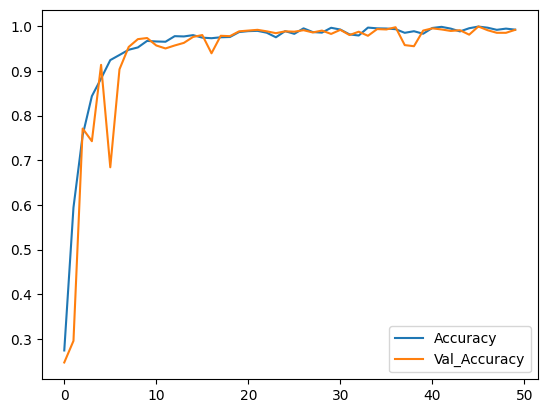

In [29]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [30]:
loss_f=pd.DataFrame(history.history)

<Axes: >

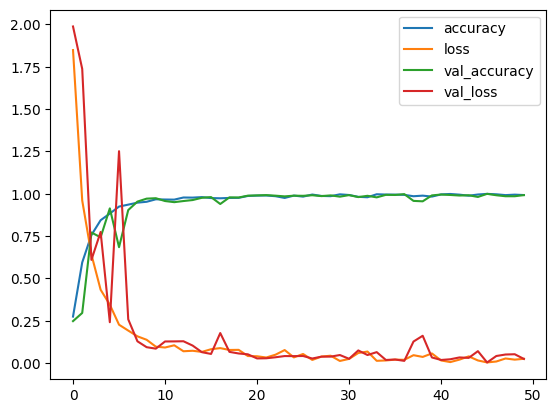

In [31]:
loss_f.plot()

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [33]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[212,   0,   2,   1,   0,   0],
       [  2, 220,   0,   0,   0,   0],
       [  0,   0, 175,   1,   0,   0],
       [  0,   1,   0, 203,   0,   0],
       [  1,   0,   0,   0, 188,   0],
       [  0,   2,   0,   0,   0, 192]])

In [34]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

In [35]:
import seaborn as sns

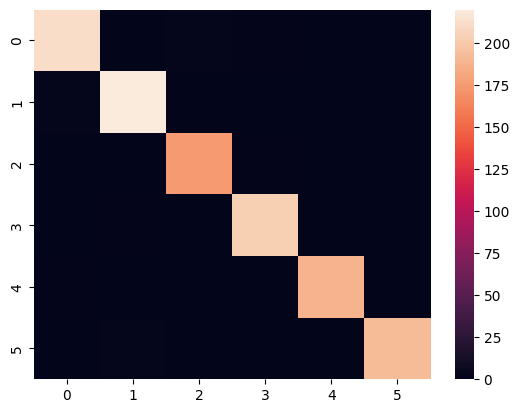

In [36]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [37]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       215
           1       0.99      0.99      0.99       222
           2       0.99      0.99      0.99       176
           3       0.99      1.00      0.99       204
           4       1.00      0.99      1.00       189
           5       1.00      0.99      0.99       194

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



### Accuracy 0.99 val_loss 0.04

### [Click for the link of the Page I Created on huggingface](https://huggingface.co/spaces/SalihB/turklira)

### [Click for more of my data analysis](https://github.com/salihBekdemir)